<a href="https://colab.research.google.com/github/harryraturi/CrowdinPOC/blob/main/Starter_code_Assignment_CNN_Skin_Cancer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [7]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization

In [8]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [9]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Test')

In [10]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [11]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=.2,
    subset="training"
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=.2,
    subset="validation"
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [14]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

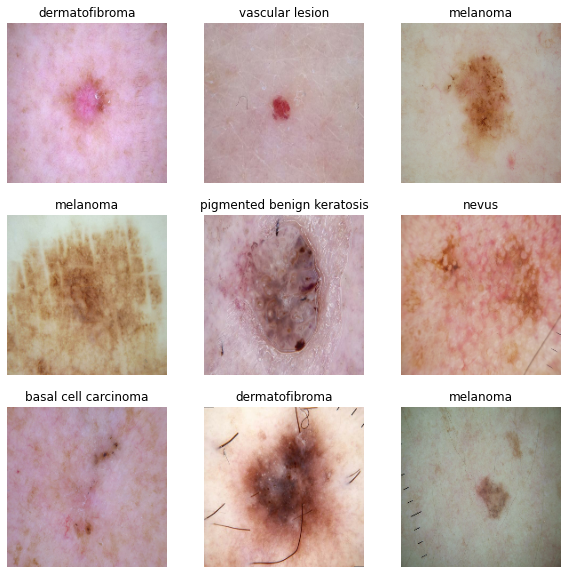

In [15]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
### Here we will check the image_batch shape and labels_batch shape

for image_batch,labels_batch in train_ds:
  print("image_batch: ",image_batch.shape)
  print("label_batch: ",labels_batch.shape)
  break

image_batch:  (32, 180, 180, 3)
label_batch:  (32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [18]:
### Your code goes here

num_classes = 9
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

### CNN
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

#Dropout layer with 50% Fraction of the input units to drop.
#model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(64, activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
# model.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(num_classes,activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [19]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [21]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 42s 82ms/step - loss: 1.8348 - accuracy: 0.3099 - val_loss: 1.6177 - val_accuracy: 0.3601
Epoch 2/20
169/169 [==============================] - 7s 39ms/step - loss: 1.4219 - accuracy: 0.4598 - val_loss: 1.3232 - val_accuracy: 0.5108
Epoch 3/20
169/169 [==============================] - 7s 40ms/step - loss: 1.2243 - accuracy: 0.5436 - val_loss: 1.2576 - val_accuracy: 0.5212
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 1.0881 - accuracy: 0.6053 - val_loss: 1.1319 - val_accuracy: 0.5991
Epoch 5/20
169/169 [==============================] - 7s 39ms/step - loss: 0.8735 - accuracy: 0.6910 - val_loss: 0.9005 - val_accuracy: 0.6815
Epoch 6/20
169/169 [==============================] - 7s 39ms/step - loss: 0.6870 - accuracy: 0.7554 - val_loss: 0.8113 - val_accuracy: 0.7223
Epoch 7/20
169/169 [==============================] - 7s 39ms/step - loss: 0.5457 - accuracy: 0.8103 - val_loss: 0.8746 - val_accuracy: 0.726

### Visualizing training results

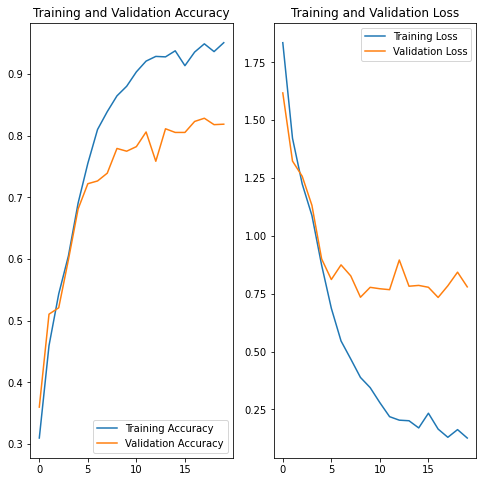

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:

def loss_accuracy(train_ds, val_ds):
  loss, accuracy = model.evaluate(train_ds, verbose=1,)
  loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

  print("Accuracy: ", accuracy)
  print("Validation Accuracy: ",accuracy_v)
  print("Loss: ",loss)
  print("Validation Loss", loss_v)


In [24]:
loss_accuracy(train_ds, val_ds)

43/43 [==============================] - 1s 17ms/step - loss: 0.7796 - accuracy: 0.8189
Accuracy:  0.9597551822662354
Validation Accuracy:  0.8188567161560059
Loss:  0.10269239544868469
Validation Loss 0.7795522809028625


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                 input_shape = (180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),    
])

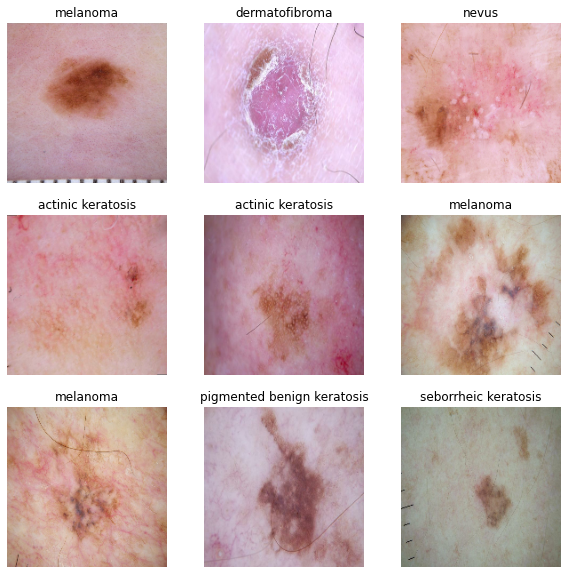

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

### CNN
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Dropout layer with 50% Fraction of the input units to drop.
#model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(512, activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(num_classes, activation='softmax'))


### Compiling the model

In [28]:
## Your code goes here
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 module_wrapper (ModuleWrapp  (None, 89, 89, 32)       0         
 er)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)      

### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 9s 48ms/step - loss: 2.3180 - accuracy: 0.1359 - val_loss: 2.1875 - val_accuracy: 0.1359
Epoch 2/20
169/169 [==============================] - 8s 48ms/step - loss: 2.1786 - accuracy: 0.1430 - val_loss: 2.1876 - val_accuracy: 0.1403
Epoch 3/20
169/169 [==============================] - 8s 48ms/step - loss: 2.1768 - accuracy: 0.1389 - val_loss: 2.1885 - val_accuracy: 0.1403
Epoch 4/20
169/169 [==============================] - 8s 48ms/step - loss: 2.1787 - accuracy: 0.1384 - val_loss: 2.1872 - val_accuracy: 0.1411
Epoch 5/20
169/169 [==============================] - 8s 48ms/step - loss: 2.1725 - accuracy: 0.1402 - val_loss: 2.1719 - val_accuracy: 0.1552
Epoch 6/20
169/169 [==============================] - 8s 48ms/step - loss: 2.1643 - accuracy: 0.1486 - val_loss: 2.1663 - val_accuracy: 0.1522
Epoch 7/20
169/169 [==============================] - 8s 47ms/step - loss: 2.1539 - accuracy: 0.1515 - val_loss: 2.1566 - val_accuracy: 0.1522

In [31]:
loss_accuracy(train_ds, val_ds)

43/43 [==============================] - 1s 17ms/step - loss: 0.9788 - accuracy: 0.6607
Accuracy:  0.7316394448280334
Validation Accuracy:  0.6607275605201721
Loss:  0.7447338104248047
Validation Loss 0.9788104891777039


### Visualizing the results

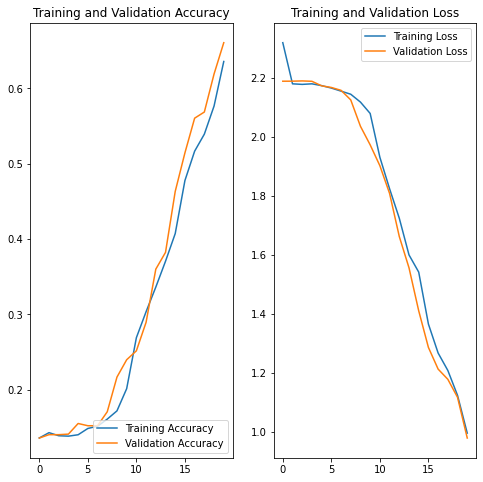

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

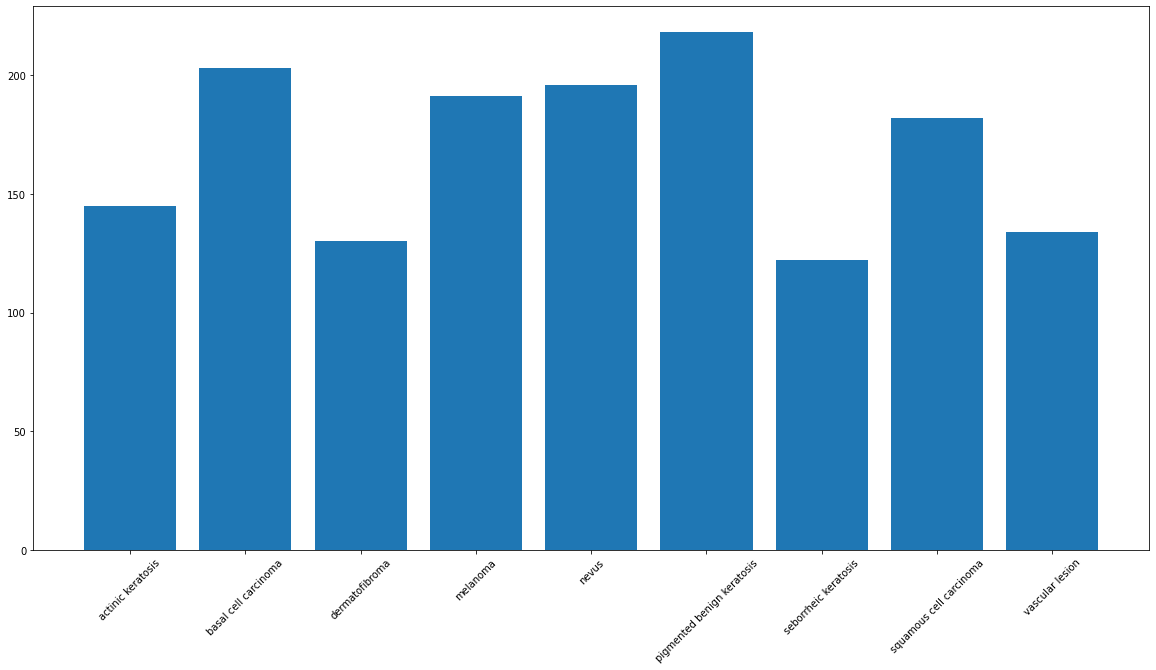

In [33]:
## Your code goes here.

import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

# plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()), rotation=45)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [34]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [35]:
path_to_training_dataset="/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/"
# path_to_training_dataset="/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/TrainAugment/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE670646340>: 100%|██████████| 500/500 [00:24<00:00, 20.40 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE6706D14C0>: 100%|██████████| 500/500 [00:26<00:00, 18.89 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE6706D1400>: 100%|██████████| 500/500 [00:22<00:00, 22.54 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE6985248B0>: 100%|██████████| 500/500 [01:42<00:00,  4.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7FE688786070>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE691502130>: 100%|██████████| 500/500 [00:20<00:00, 24.09 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FE6B1A604C0>: 100%|██████████| 500/500 [00:47<00:00, 10.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE6745E1970>: 100%|██████████| 500/500 [00:21<00:00, 22.93 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE670671700>: 100%|██████████| 500/500 [00:21<00:00, 23.44 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010533.jpg_62e8f5c5-e3a3-4941-b3ca-eeae282c995b.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010194.jpg_96879a4d-0733-4914-b291-1c907a0874fe.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010000.jpg_2f2dd642-4e87-4e60-96a6-ccce04a2477b.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010175.jpg_89190596-0c0f-4d3b-ab15-4c35bcb9e348.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0000517.jpg_980cb935-311e-4dfc-8460-9fa93df364ee.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010349.jpg_b568dd14-bd5a-4814-a16e-f14ded2aa666.jpg',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/T

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [40]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)
new_df = df2

In [41]:
new_df['Label'].value_counts()

melanoma                      1000
pigmented benign keratosis    1000
actinic keratosis             1000
vascular lesion               1000
dermatofibroma                1000
nevus                         1000
seborrheic keratosis          1000
squamous cell carcinoma       1000
basal cell carcinoma          1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

In [43]:
# new_df.Path[0]
dataframe_dict_new

{'/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010533.jpg_62e8f5c5-e3a3-4941-b3ca-eeae282c995b.jpg': 'melanoma',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010194.jpg_96879a4d-0733-4914-b291-1c907a0874fe.jpg': 'melanoma',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010000.jpg_2f2dd642-4e87-4e60-96a6-ccce04a2477b.jpg': 'melanoma',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010175.jpg_89190596-0c0f-4d3b-ab15-4c35bcb9e348.jpg': 'melanoma',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0000517.jpg_980cb935-311e-4dfc-8460-9fa93df364ee.jpg': 'melanoma',
 '/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/melanoma/output/melanoma_original_ISIC_0010349.jpg_b568dd14-bd5a-4814-a16e-f14ded2aa666.jpg'

#### **Todo:** Create a training dataset

In [44]:
# data_dir_train="path to directory with training data + data created using augmentor"
data_dir_train="/content/gdrive/MyDrive/MLDataset/SkinCancerISICImages/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [46]:
## your code goes here

num_classes = 9
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

### CNN
#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Dropout layer with 50% Fraction of the input units to drop.
#model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(num_classes, activation='softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [47]:
## your code goes here
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 89, 89, 32)       128       
 ormalization)                                                   
                                                                 
 module_wrapper_3 (ModuleWra  (None, 89, 89, 32)       0         
 pper)                                                           
                                                      

#### **Todo:**  Train your model

In [49]:
epochs = 30
## Your code goes here, use 50 epochs.
# history = # your model fit code
# epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 64s 216ms/step - loss: 1.8236 - accuracy: 0.4178 - val_loss: 3.0410 - val_accuracy: 0.1295
Epoch 2/30
281/281 [==============================] - 53s 183ms/step - loss: 1.2707 - accuracy: 0.5595 - val_loss: 1.8688 - val_accuracy: 0.3899
Epoch 3/30
281/281 [==============================] - 54s 190ms/step - loss: 0.9387 - accuracy: 0.6694 - val_loss: 0.9566 - val_accuracy: 0.6604
Epoch 4/30
281/281 [==============================] - 52s 180ms/step - loss: 0.7283 - accuracy: 0.7339 - val_loss: 1.0840 - val_accuracy: 0.6026
Epoch 5/30
281/281 [==============================] - 54s 191ms/step - loss: 0.5635 - accuracy: 0.7946 - val_loss: 2.0969 - val_accuracy: 0.4869
Epoch 6/30
281/281 [==============================] - 53s 184ms/step - loss: 0.4536 - accuracy: 0.8379 - val_loss: 0.5422 - val_accuracy: 0.7913
Epoch 7/30
281/281 [==============================] - 54s 187ms/step - loss: 0.3692 - accuracy: 0.8662 - val_loss: 0.6473 - val_ac

#### **Todo:**  Visualize the model results

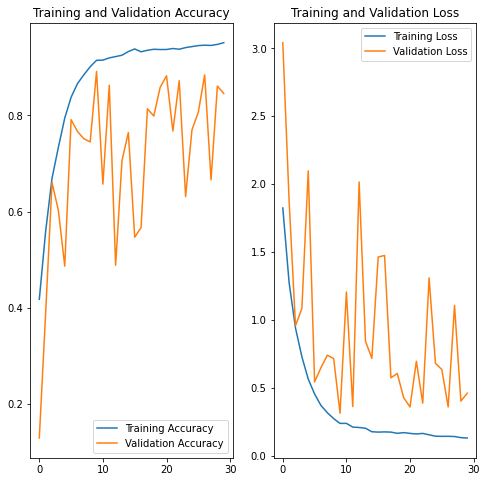

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

